In [1]:
from plotting.plot_utils import PlotParams

In [2]:
from plotting.lare_matplot import basic_plot

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
xdata = [x for x in range(10)]

In [6]:
ydata = [x**2 for x in xdata]

In [7]:
params = PlotParams()

In [8]:
params.xax = xdata

In [9]:
params.yax = ydata

In [10]:
params.title = "First try"

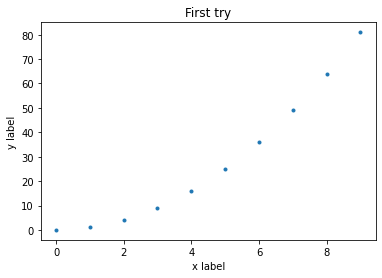

In [11]:
basic_plot(params)

In [12]:
data = pd.read_csv("test_df_2.csv")
data["date_time"] = pd.to_datetime(data["date_time"], format="%m/%d/%Y %H:%M")

In [13]:
from integrity.compliance import all_required_exist

In [14]:
all_required_exist(data)

(False,
 {'property_seized'},
 {'Gender Nonconforming',
  'Person Search Consent Given',
  'Property Search Consent Given',
  'Unnamed: 0'})

In [15]:
from integrity.compliance import *

In [16]:
verbose_checks(data)

All required fields exist: FAIL
   Missing fields: {'property_seized'}
   Extra fields:   {'Gender Nonconforming', 'Unnamed: 0', 'Person Search Consent Given', 'Property Search Consent Given'}
All stops unique: PASS


In [17]:
    uniqs = set(data["stop_id"].unique())
    dups = set(data["stop_id"]).difference(uniqs)


In [18]:
len(uniqs)

1425

In [19]:
len(dups)

0

In [20]:
from integrity.temporal import weekday_trends

In [21]:
success, plotparams, _ = weekday_trends(data.drop_duplicates(subset = "stop_id"))

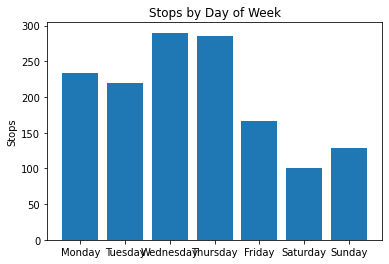

In [22]:
basic_plot(plotparams)

In [23]:
interval = pd.Interval(pd.Timestamp('2020-01-01 00:00:00'), pd.Timestamp('2021-01-01 00:00:00'), closed='left')

In [24]:
interval

Interval('2020-01-01', '2021-01-01', closed='left')

In [25]:
int2 = pd.Timestamp('2020-01-01 00:00:00') - pd.Timestamp('2021-01-01 00:00:00')

In [26]:
int2

Timedelta('-366 days +00:00:00')

In [27]:
int3 = pd.Timedelta('30 days')

In [28]:
int3

Timedelta('30 days 00:00:00')

In [29]:
-int2 > int3

True

In [30]:
min(data["date_time"])

Timestamp('2021-02-01 10:40:00')

In [31]:
gaps = data["date_time"].diff()

In [32]:
type(gaps)

pandas.core.series.Series

In [33]:
type(max(gaps.dropna()))

pandas._libs.tslibs.timedeltas.Timedelta

In [34]:
maxgap_idx = gaps[gaps == max(gaps.dropna())].index

In [35]:
maxgap_idx

Int64Index([16109], dtype='int64')

In [36]:
data.loc[maxgap_idx]

,Unnamed: 0,stop_id,date_time,duration,call_for_service,location,actions_taken,Person Search Consent Given,Property Search Consent Given,basis_for_search,reason_for_stop,result,limited_english,age,gender,Gender Nonconforming,lgbt,race,disabilities,evidence_found
16109,16109,2266,2021-07-26 05:26:00,45,No,N San Antonio Rd,Person removed from vehicle by order,No,No,No Search,Traffic Violation,Contacted parent/legal guardian or other perso...,No,16,Male,No,No,Hispanic/Latino/a,None,None


In [37]:
long_gaps = gaps[gaps > pd.Timedelta('24 hours')]

In [38]:
long_gaps

3200    1 days 12:44:00
4015    1 days 02:09:00
4183    1 days 01:23:00
4185    1 days 05:51:00
5830    1 days 01:24:00
13724   1 days 00:39:00
13918   1 days 11:25:00
14408   1 days 00:47:00
15306   1 days 00:02:00
15371   1 days 02:32:00
15423   1 days 10:42:00
15492   1 days 02:03:00
15549   1 days 00:38:00
15560   1 days 16:19:00
15656   1 days 20:19:00
16055   1 days 10:06:00
16109   2 days 13:57:00
Name: date_time, dtype: timedelta64[ns]

In [39]:
len(long_gaps)

17

In [40]:
len(data)

16177

In [41]:
type(long_gaps[3200])


pandas._libs.tslibs.timedeltas.Timedelta

In [42]:
for idx in long_gaps.index:
    print("{}:  {} to {}".format(long_gaps[idx], data.loc[idx-1].date_time, data.loc[idx].date_time))
    #print(data.loc[idx])

1 days 12:44:00:  2021-02-27 19:43:00 to 2021-03-01 08:27:00
1 days 02:09:00:  2021-03-03 04:04:00 to 2021-03-04 06:13:00
1 days 01:23:00:  2021-03-12 12:58:00 to 2021-03-13 14:21:00
1 days 05:51:00:  2021-03-14 03:43:00 to 2021-03-15 09:34:00
1 days 01:24:00:  2021-04-03 04:25:00 to 2021-04-04 05:49:00
1 days 00:39:00:  2021-04-20 09:25:00 to 2021-04-21 10:04:00
1 days 11:25:00:  2021-05-07 22:26:00 to 2021-05-09 09:51:00
1 days 00:47:00:  2021-05-28 14:34:00 to 2021-05-29 15:21:00
1 days 00:02:00:  2021-06-04 20:19:00 to 2021-06-05 20:21:00
1 days 02:32:00:  2021-06-13 08:33:00 to 2021-06-14 11:05:00
1 days 10:42:00:  2021-06-17 08:01:00 to 2021-06-18 18:43:00
1 days 02:03:00:  2021-06-24 20:38:00 to 2021-06-25 22:41:00
1 days 00:38:00:  2021-07-02 19:28:00 to 2021-07-03 20:06:00
1 days 16:19:00:  2021-07-05 01:07:00 to 2021-07-06 17:26:00
1 days 20:19:00:  2021-07-10 23:45:00 to 2021-07-12 20:04:00
1 days 10:06:00:  2021-07-19 00:48:00 to 2021-07-20 10:54:00
2 days 13:57:00:  2021-0

In [43]:
data.loc[3199].date_time

Timestamp('2021-02-27 19:43:00')

In [44]:
import integrity.temporal as tp

In [45]:
tp.verbose_checks(data)

Sufficient time duration: PASS
First stop: 2021-02-01 10:40:00
Last stop:  2021-07-31 23:36:00
Duration of data set: 180 days 12:56:00
Check for unexpected data gaps: FAIL
Index:   Duration:
3200:  1 days 12:44:00,   2021-02-27 19:43:00 to 2021-03-01 08:27:00
4015:  1 days 02:09:00,   2021-03-03 04:04:00 to 2021-03-04 06:13:00
4183:  1 days 01:23:00,   2021-03-12 12:58:00 to 2021-03-13 14:21:00
4185:  1 days 05:51:00,   2021-03-14 03:43:00 to 2021-03-15 09:34:00
5830:  1 days 01:24:00,   2021-04-03 04:25:00 to 2021-04-04 05:49:00
13724:  1 days 00:39:00,   2021-04-20 09:25:00 to 2021-04-21 10:04:00
13918:  1 days 11:25:00,   2021-05-07 22:26:00 to 2021-05-09 09:51:00
14408:  1 days 00:47:00,   2021-05-28 14:34:00 to 2021-05-29 15:21:00
15306:  1 days 00:02:00,   2021-06-04 20:19:00 to 2021-06-05 20:21:00
15371:  1 days 02:32:00,   2021-06-13 08:33:00 to 2021-06-14 11:05:00
15423:  1 days 10:42:00,   2021-06-17 08:01:00 to 2021-06-18 18:43:00
15492:  1 days 02:03:00,   2021-06-24 20:38:

NameError: name 'counts' is not defined

In [ ]:
data["date_time"].round("d").value_counts()

In [46]:
data_unique = data.drop_duplicates(subset="stop_id")

In [ ]:
len(data_unique)

In [ ]:
counts = data_unique["date_time"].dt.floor("d").value_counts()

In [ ]:
data_unique["date_time"].apply(lambda x: x.month_name()).value_counts()

In [ ]:
len(data_unique["date_time"].round("d").value_counts().values)

In [ ]:
data_unique["date_time"].loc[0].floor("d")

In [ ]:
july28 = data[data["date_time"].dt.floor("d") == pd.Timestamp("2021-07-28")]

In [ ]:
july28

In [ ]:
suc, pparam, bad_days = tp.stops_by_day(data_unique)

In [ ]:
basic_plot(pparam)

In [ ]:
bad_days

In [ ]:
tp.verbose_checks(data_unique)

In [ ]:
bob=pd.date_range("2022-01-01", "2022-01-10", freq="H")

In [ ]:
len(bob)

In [ ]:
start_date = pd.Timestamp("2022-01-01")

In [ ]:
end_date = pd.Timestamp("2022-06-30 23:59:59")

In [ ]:
res = pd.Series([x.day for x in pd.date_range(start_date, end_date, freq='D')]).value_counts()

In [ ]:
res[29]

In [ ]:
freq_dict = {"day": ["D", 31],
             "hour": ["H", 24],
             "month": ["M", 12],
             "second": ["S", 60],
             "minute": ["min", 60]}

In [ ]:
def count_time_elements(start_time, end_time, freq):
    drange = pd.date_range(start_time, end_time, freq=freq_dict[freq][0])
    if len(drange) < 10000:
        res = pd.Series([getattr(x, freq) for x in drange]).value_counts()
    else:
        print("Too long. {}".format(len(drange)))
        tdelta = len(drange)
        print("{}/{} = {}".format(tdelta, freq_dict[freq][1], tdelta/freq_dict[freq][1]))
        res = pd.Series([tdelta/freq_dict[freq][1] for x in range(freq_dict[freq][1])], 
                       index=[x for x in range(freq_dict[freq][1])])
    return res

In [ ]:
day_counts = count_time_elements(start_date, end_date, "day")

In [ ]:
stops = data_unique["date_time"].apply(lambda x: x.day).value_counts()

In [ ]:
stops/day_counts

In [ ]:
stops

In [ ]:
hour_counts = count_time_elements(start_date, end_date, "hour")

In [ ]:
stops = data_unique["date_time"].apply(lambda x: x.hour).value_counts()

In [ ]:
stops/hour_counts

In [ ]:
stops.sort_index().index.to_list()

In [47]:
success, plotparams, bad_hours = tp.hourly_trends(data_unique)

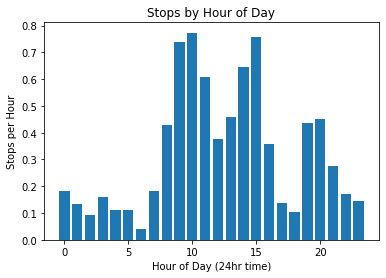

In [48]:
basic_plot(plotparams)

In [49]:
success

True

In [50]:
success, plotparams, bad_days = tp.day_of_month_trends(data_unique)

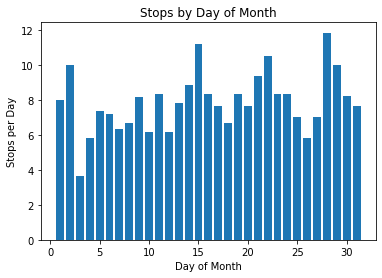

In [51]:
basic_plot(plotparams)

In [53]:
success

True

In [ ]:
stops

In [90]:
(data_unique["duration"].value_counts())

5      329
8      245
10     238
3       79
7       64
4       60
15      58
12      57
9       54
2       43
6       40
11      21
20      19
13      12
25      11
30      10
1       10
14       9
16       8
45       7
18       6
60       6
35       6
40       4
17       3
180      2
50       2
26       2
32       2
24       2
37       1
70       1
189      1
19       1
140      1
134      1
120      1
90       1
67       1
38       1
65       1
22       1
56       1
28       1
41       1
380      1
Name: duration, dtype: int64

In [108]:
data_unique["race"].value_counts().keys()

Index(['White', 'Hispanic/Latino/a', 'Asian', 'Middle Eastern or South Asian',
       'Black/African American', 'Pacific Islander', 'Native American'],
      dtype='object')

In [109]:
(data_unique["race"].value_counts().values/np.gcd.reduce(data_unique["race"].value_counts().values)).astype(int)

array([593, 330, 241, 177,  56,  23,   5])

In [93]:
data_unique["duration"].value_counts().values

array([329, 245, 238,  79,  64,  60,  58,  57,  54,  43,  40,  21,  19,
        12,  11,  10,  10,   9,   8,   7,   6,   6,   6,   4,   3,   2,
         2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1])

In [71]:
1401/3

467.0

In [72]:
import math as math

In [74]:
math.gcd(1401, 24)

3

In [79]:
np.gcd.reduce([1401, 24])

3